Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

Read csv files and add new Columns

In [2]:
euro_50 = pd.read_csv("euro50.csv")
sp_500 = pd.read_csv("sp500.csv")

euro_50['Date'] = pd.to_datetime(euro_50['Date'], utc=True)
euro_50.insert(1, "DayWeek", 0)
euro_50.insert(2, "Month", 0)
euro_50.insert(3, "Year", 0)
euro_50.insert(4, "Ror", 0)

sp_500['Date'] = pd.to_datetime(sp_500['Date'], utc=True)
sp_500.insert(1, "DayWeek", 0)
sp_500.insert(2, "Month", 0)
sp_500.insert(3, "Year", 0)
sp_500.insert(4, "Ror", 0)

Add Date infomations

In [7]:
euro_50["Year"] = euro_50["Date"].apply(lambda x: x.year)
euro_50["Month"] = euro_50["Date"].apply(lambda x: x.month)
euro_50["DayWeek"] = euro_50["Date"].apply(lambda x: x.day_of_week)

euro_50["Ror"] =  euro_50["Close"].pct_change()

sp_500["Year"] = sp_500["Date"].apply(lambda x: x.year)
sp_500["Month"] = sp_500["Date"].apply(lambda x: x.month)
sp_500["DayWeek"] = sp_500["Date"].apply(lambda x: x.day_of_week)

sp_500["Ror"] =  sp_500["Close"].pct_change()

Monthly percentage return (intended over 20 trading days) and annual (intended over 252 trading days), divided by index

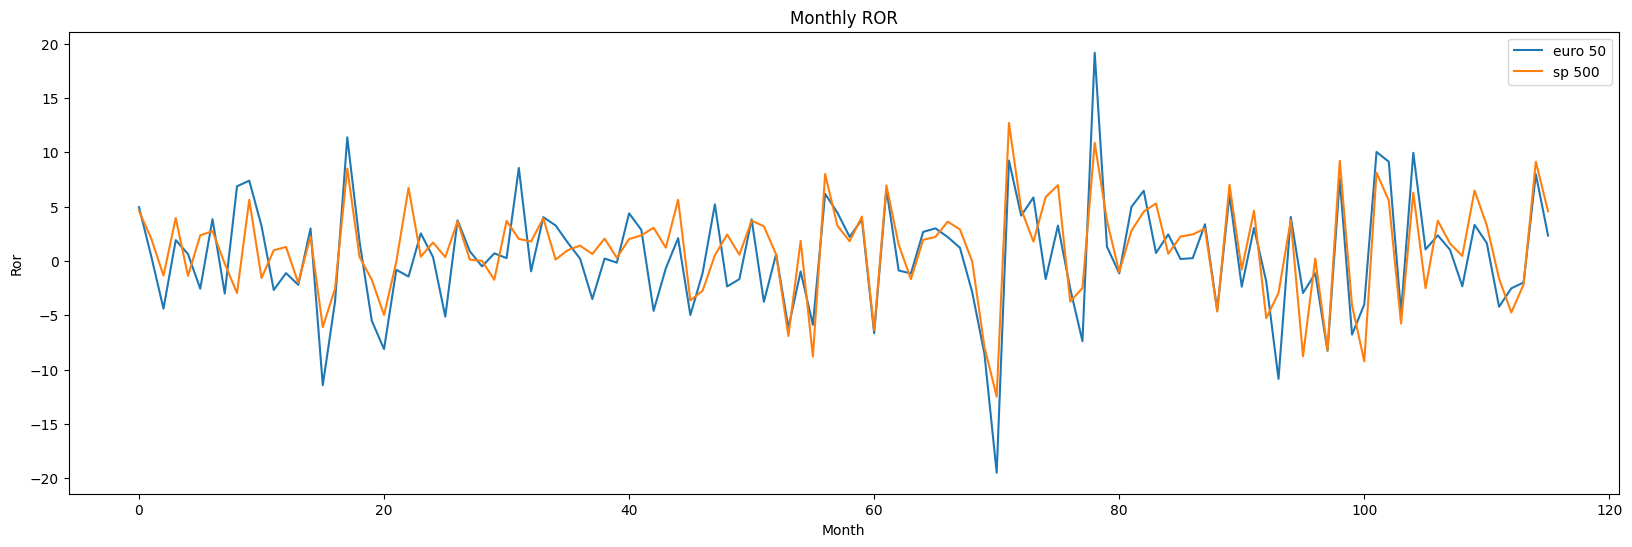

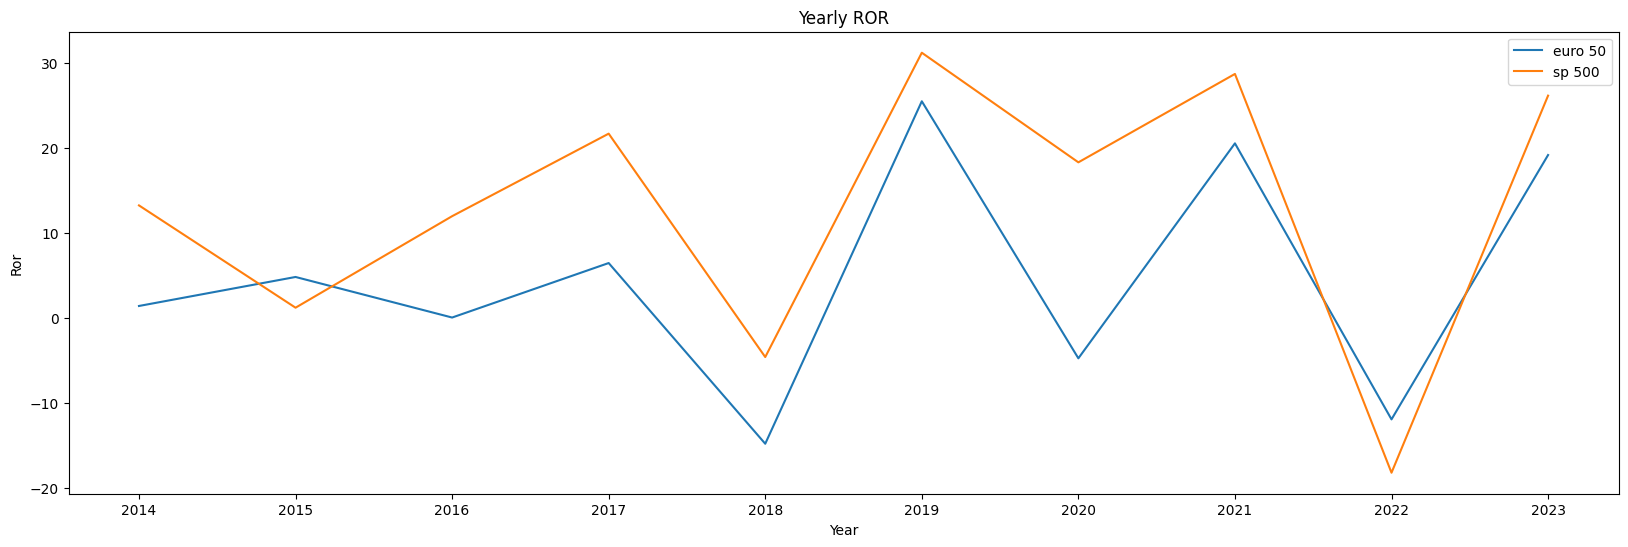

In [69]:
ror_month_euro_50 = []
ror_year_euro_50 = []
ror_month_sp_500 = []
ror_year_sp_500 = []

# save in a variables first "Close" value for both dataframe to be used instead of previous month/year Close value for first month/year
euro_50_first_close = euro_50['Close'][0]
sp_500_first_close = sp_500['Close'][0]

# store first month/year for flexibility (only euro50 is useb because both files start from same day)
first_year = euro_50['Year'][0]
first_month = euro_50['Month'][0]


# both calculation in the same loop divided in two different part: First for the Year and after another nesting loop we have the month calculation
for index_year in range(10):

    """
    Annual Percentage Return
    1. Filter datas for every year and reset index 
    2. Starting from the first day we have valid datas (in the first year the datas don't start from 1st of January)
    3. Calculate the ror using the last value of the last day of year and last day of previous year
    4. Append ror in a new dataframe 
    5. Repeat the calculation for both index  
    """
    
    # for the second year previous dataframe is stored inside a "..._previous" variable to be used in the calculation
    if index_year > 0:
        euro_50_Filtered_year_previous = euro_50_year_Filtered
        dim_year_previous = dim_year
        sp_500_Filtered_year_previous = sp_500_year_Filtered
        dim1_year_previous = dim1_year
    
    # filter both dataframe based on the actual year in the loop
    euro_50_year_Filtered = euro_50[euro_50['Year'] == index_year + first_year]
    euro_50_year_Filtered = euro_50_year_Filtered.reset_index(drop=True)
    
    sp_500_year_Filtered = sp_500[sp_500['Year'] == index_year + first_year]
    sp_500_year_Filtered = sp_500_year_Filtered.reset_index(drop=True)
   
    # calculate the dimension of the dataframe to extract the last Close Value  
    dim_year = len(euro_50_year_Filtered) - 1
    dim1_year = len(sp_500_year_Filtered) - 1
    
    # for the first year we use the "..._first_Close" value stored before for ror calculation and added in a new dataframe    
    if index_year == 0:
        
        ror_act = float(100 * (euro_50_year_Filtered["Close"][dim_year] - euro_50_first_close) / euro_50_first_close)
        ror_year_euro_50.append(ror_act)
        
        ror_act = float(100 * (sp_500_year_Filtered["Close"][dim1_year] - sp_500_first_close) / sp_500_first_close)
        ror_year_sp_500.append(ror_act)
    
    # from the secon year the "..._previous" value is used for ror calculation and added in a new dataframe
    else:
        ror_act = float(100 * (euro_50_year_Filtered["Close"][dim_year] - euro_50_Filtered_year_previous["Close"][dim_year_previous]) / euro_50_Filtered_year_previous["Close"][dim_year_previous])
        ror_year_euro_50.append(ror_act)
        
        ror_act = float(100 * (sp_500_year_Filtered["Close"][dim1_year] - sp_500_Filtered_year_previous["Close"][dim1_year_previous]) / sp_500_Filtered_year_previous["Close"][dim1_year_previous])
        ror_year_sp_500.append(ror_act)
    
    for index_month in range(12):
        
        """
        Montly Percentage Return
        1. use the same loop even for the second calculation in this case with a second loop to reach every month inside every year
        2. Filter datas for every month and reset index 
        3. Starting from the first day we have valid datas (in the first year the datas don't start from 1st of January)
        4. Calculate the ror using the last value of the last day of month and last day of previous month
        5. Append ror in a new dataframe 
        6. Repeat the calculation for both index  
        """
        
        if index_year + first_year > first_year or index_month > first_month:
            
            # excluding first month copy filtered value inside a "previous" variables to have in the same cycle actual and previous value
            
            euro_50_Filtered_month_previous = euro_50_month_Filtered
            dim_month_previous = dim_month
            sp_500_Filtered_month_previous = sp_500_month_Filtered
            dim1_month_previous = dim1_month
        
        # filter the Dataframe for each month and reset the Index
        euro_50_month_Filtered = euro_50[(euro_50['Month'] == index_month + 1) & (euro_50['Year'] == (index_year + first_year))]
        euro_50_month_Filtered = euro_50_month_Filtered.reset_index(drop=True)
               
        sp_500_month_Filtered = sp_500[(sp_500['Month'] == index_month  + 1) & (sp_500['Year'] == (index_year + first_year))]
        sp_500_month_Filtered = sp_500_month_Filtered.reset_index(drop=True)
        
        # calculate the dimension of the dataframe to extract the last Close Value  
        dim_month = len(euro_50_month_Filtered) - 1 
        dim1_month = len(sp_500_month_Filtered) - 1
        
        # for the first month of the first year we use the "..._first_Close" value stored before for ror calculation and added in a new dataframe    
        if index_year + first_year == first_year and index_month == first_month:
                    
            ror_act = float(100 * (euro_50_month_Filtered["Close"][dim_month] - euro_50_first_close) / euro_50_first_close)
            ror_month_euro_50.append(ror_act)
            
            ror_act = float(100 * (sp_500_month_Filtered["Close"][dim1_month] - sp_500_first_close) / sp_500_first_close)
            ror_month_sp_500.append(ror_act)
        
        # from the next month "..._previous" value is used for ror calculation and added in a new dataframe
        elif index_year + first_year > first_year or index_month > first_month:
            
            ror_act = float(100 * (euro_50_month_Filtered["Close"][dim_month] - euro_50_Filtered_month_previous["Close"][dim_month_previous]) / euro_50_Filtered_month_previous["Close"][dim_month_previous])
            ror_month_euro_50.append(ror_act)

            ror_act = float(100 * (sp_500_month_Filtered["Close"][dim1_month] - sp_500_Filtered_month_previous["Close"][dim1_month_previous]) / sp_500_Filtered_month_previous["Close"][dim1_month_previous])
            ror_month_sp_500.append(ror_act)
        
"""
Montly percentage Plot    
"""

fig, ax = plt.subplots(figsize=(20,6))

ax.set_xlabel('Month')
ax.set_ylabel('Ror')
ax.set_title('Monthly ROR')

rect1, = ax.plot(ror_month_euro_50, label = "euro 50")
rect2, = ax.plot(ror_month_sp_500, label = "sp 500")

ax.legend()


"""
Yearly Percentage Plot    
"""

fig1, ax1 = plt.subplots(figsize=(20,6))
values = ["2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

ax1.set_xlabel('Year')
ax1.set_ylabel('Ror')
ax1.set_title('Yearly ROR')

rect1_1 = ax1.plot(values, ror_year_euro_50, label = "euro 50")
rect2_1 = ax1.plot(values, ror_year_sp_500, label = "sp 500")
ax1.legend()

plt.show()

Average daily return divided by index and day of the week

[0.00108546, 0.00098675, -0.00047067, 0.00016218, nan, nan, -0.00047185]

[0.00048327, 0.00051571, 0.00078946, 0.00038828, 0.00051963, nan, nan]

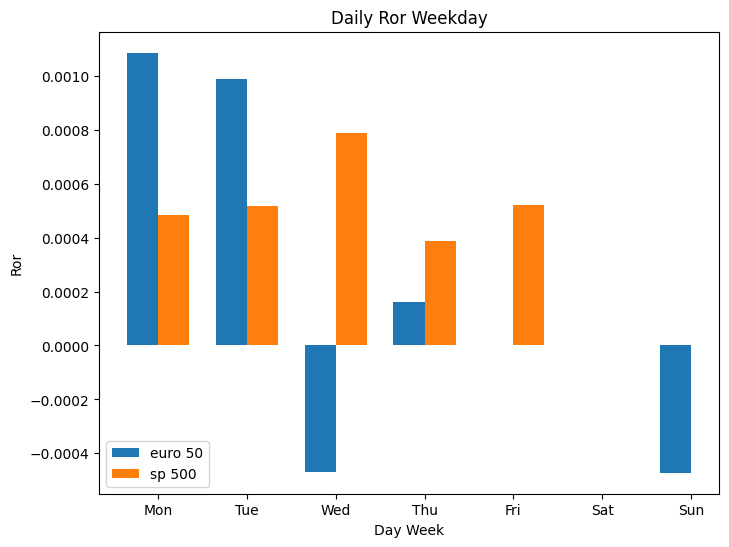

In [72]:
ror_dayweek_euro_50_mean = []
ror_dayweek_sp_500_mean = []

# filter both dataframe based on day of week and add those value in a new dataframe 
for index  in range(7):
    euro_50_Filtered = euro_50[(euro_50['DayWeek'] == index)]
    sp_500_Filtered = sp_500[(sp_500['DayWeek'] == index)]
    ror_dayweek_euro_50_mean.append(round(euro_50_Filtered["Ror"].mean(), 8))
    ror_dayweek_sp_500_mean.append(round(sp_500_Filtered["Ror"].mean(), 8))

#show alla values
display(ror_dayweek_euro_50_mean)    
display(ror_dayweek_sp_500_mean)  

"""
Plot    
"""

xval = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
yval_euro_50 = ror_dayweek_euro_50_mean
yval_sp_500 = ror_dayweek_sp_500_mean

x = np.arange(len(xval))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel('Day Week')
ax.set_ylabel('Ror')
ax.set_title('Daily Ror Weekday')
ax.set_xticks(x, xval)

rect1 = ax.bar(x - width/2, yval_euro_50, width, label = "euro 50")
rect2 = ax.bar(x + width/2, yval_sp_500, width, label = "sp 500")

ax.legend()

plt.show()


Identify the day with the highest daily return and the lowest return, distinguished between the two indices

In [20]:
# euro50: calculate max value and the day where the max value is
act_ror_bigger = euro_50["Ror"].max()
act_ror_lower_date = euro_50["Date"][euro_50["Ror"].idxmin()] 
string_date_low_euro50 = act_ror_lower_date.strftime("%d-%m-%Y")

# euro50: calculate min value and the day where the min value is
act_ror_lower = euro_50["Ror"].min()
act_ror_bigger_date = euro_50["Date"][euro_50["Ror"].idxmax()] 
string_date_high_euro50 = act_ror_bigger_date.strftime("%d-%m-%Y")

print(f"il giorno con il rendimento peggiore per euro50 è {string_date_low_euro50} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per euro50 è {string_date_high_euro50} con un rendimento di {round(act_ror_bigger, 4)}")

# sp500: calculate max value and the day where the max value is
act_ror_bigger = sp_500["Ror"].max()
act_ror_lower_date = sp_500["Date"][sp_500["Ror"].idxmin()] 
string_date_low_sp_500 = act_ror_lower_date.strftime("%d-%m-%Y")

# sp500: calculate min value and the day where the min value is
act_ror_lower = sp_500["Ror"].min()
act_ror_bigger_date = sp_500["Date"][sp_500["Ror"].idxmax()] 
string_date_high_sp_500 = act_ror_bigger_date.strftime("%d-%m-%Y")
     
print(f"il giorno con il rendimento peggiore per sp_500 è {string_date_low_sp_500} con un rendimento di {round(act_ror_lower, 4)}")
print(f"il giorno con il rendimento migliore per sp_500 è {string_date_high_sp_500} con un rendimento di {round(act_ror_bigger, 4)}")

il giorno con il rendimento peggiore per euro50 è 11-03-2020 con un rendimento di -0.124
il giorno con il rendimento migliore per euro50 è 23-03-2020 con un rendimento di 0.0924
il giorno con il rendimento peggiore per sp_500 è 16-03-2020 con un rendimento di -0.1094
il giorno con il rendimento migliore per sp_500 è 24-03-2020 con un rendimento di 0.0906


Calculate the average daily volume of the two indices

In [13]:
#Calculate mean value
mean_euro_50 = euro_50["Volume"].mean()
mean_sp_500_df = sp_500["Volume"].mean()

print(f"la media giornaliera per l'indice euro_50:  {round(mean_euro_50, 2)}") 
print(f"la media giornaliera per l'indice sp_500_df {round(mean_sp_500_df, 2)}") 

la media giornaliera per l'indice euro_50:  41934439.53
la media giornaliera per l'indice sp_500_df 91289037.89
